Logistic Regression trained successfully.
KNN trained successfully.
Decision Tree trained successfully.
SVM trained successfully.
Logistic Regression trained successfully for visualization.
KNN trained successfully for visualization.
Decision Tree trained successfully for visualization.
SVM trained successfully for visualization.


<Figure size 800x600 with 0 Axes>

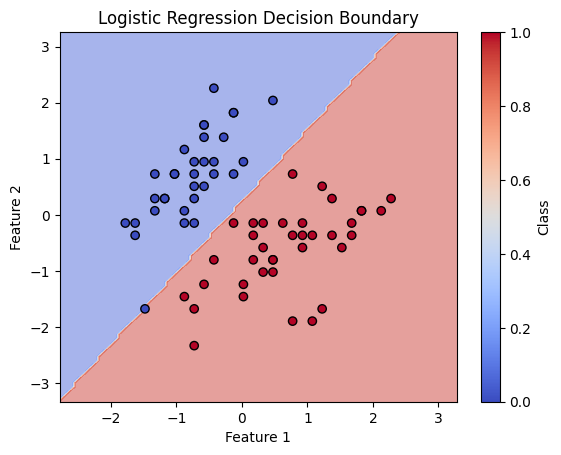

<Figure size 800x600 with 0 Axes>

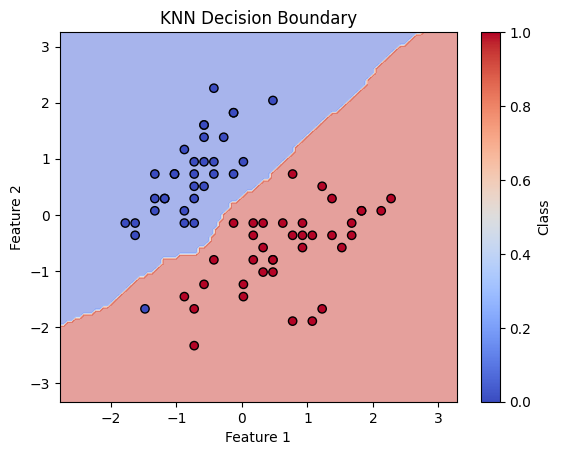

<Figure size 800x600 with 0 Axes>

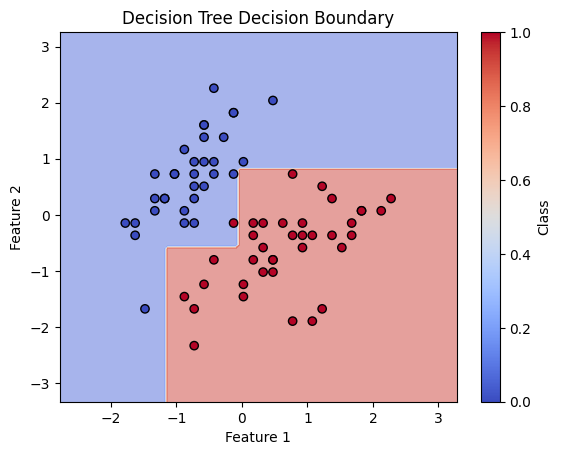

<Figure size 800x600 with 0 Axes>

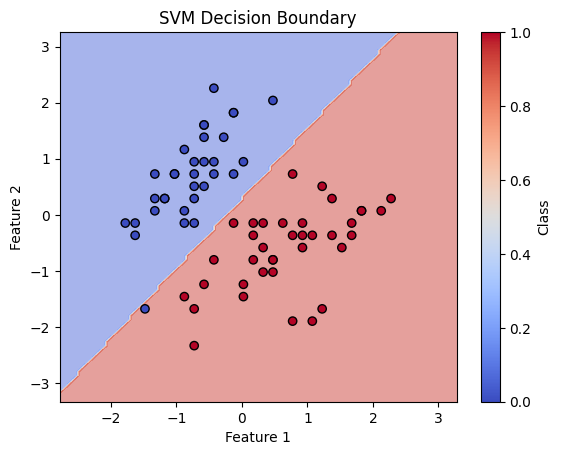

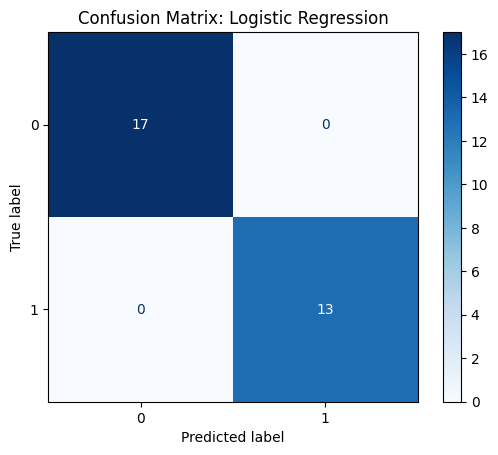

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



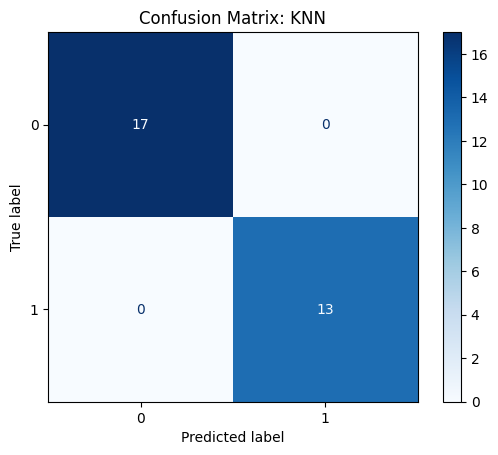

Classification Report for KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



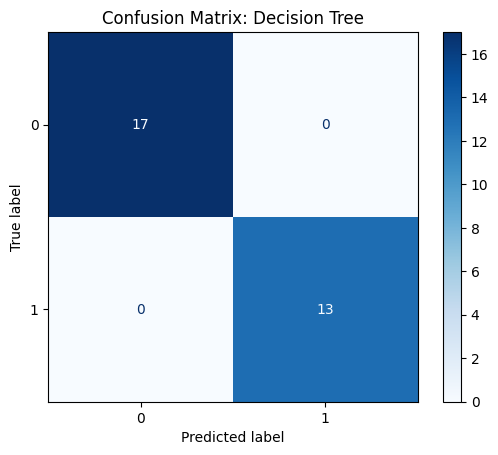

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



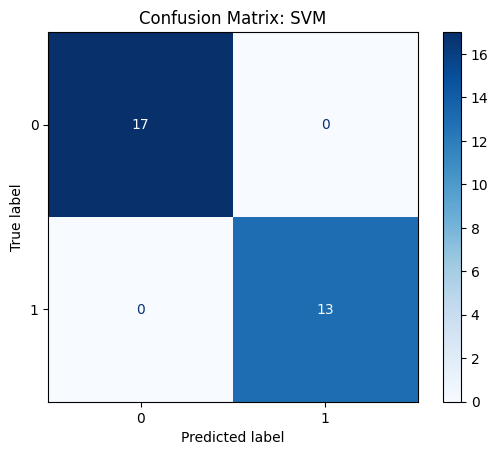

Classification Report for SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



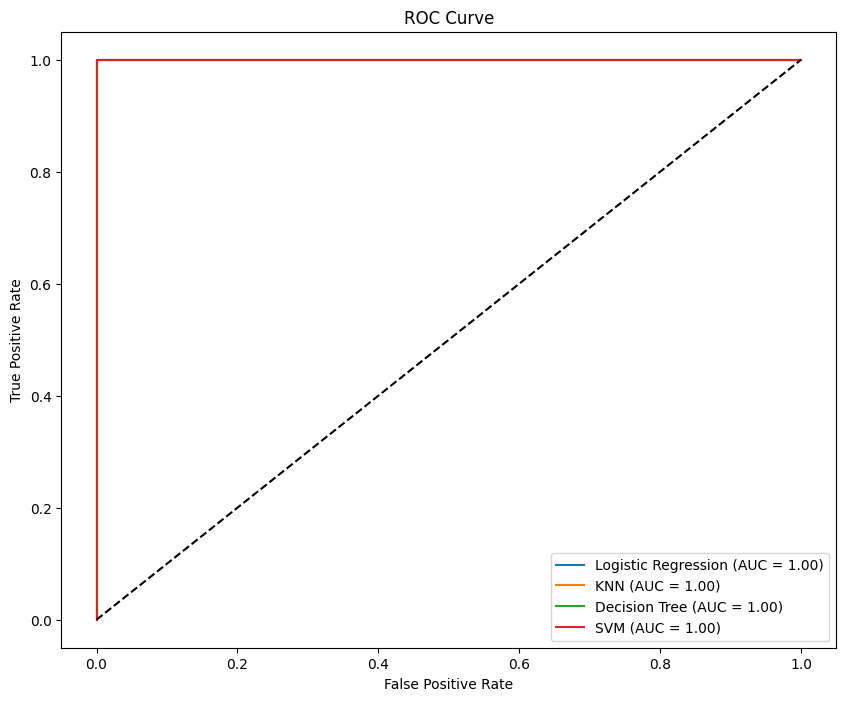

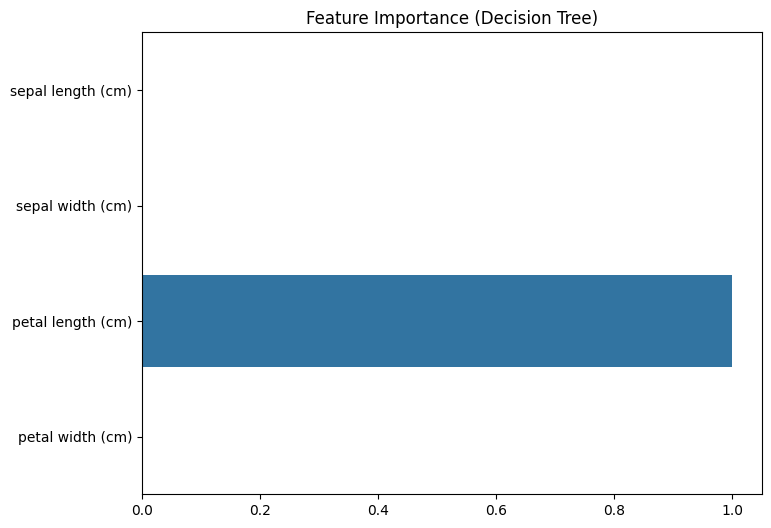

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Binary Classification: Use classes 0 and 1
X = df.drop(columns=['target'])[df['target'] != 2]
y = df['target'][df['target'] != 2]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Models
logistic = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
svm = SVC(probability=True, kernel='linear', random_state=42)

models = {
    'Logistic Regression': logistic,
    'KNN': knn,
    'Decision Tree': dt,
    'SVM': svm
}

# Train Models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

# Use only the first two features for decision boundary visualization
X_train_2d = X_train[:, :2]  # First two features
X_test_2d = X_test[:, :2]

# Add new models specifically for visualization
models_visualization = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3),
    'SVM': SVC(probability=True, kernel='linear', random_state=42)
}

# Train these visualization-specific models
for name, model in models_visualization.items():
    model.fit(X_train_2d, y_train)
    print(f"{name} trained successfully for visualization.")

<Figure size 800x600 with 0 Axes>

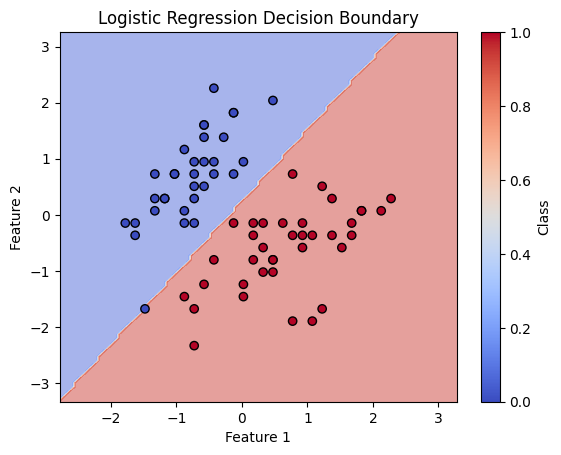

<Figure size 800x600 with 0 Axes>

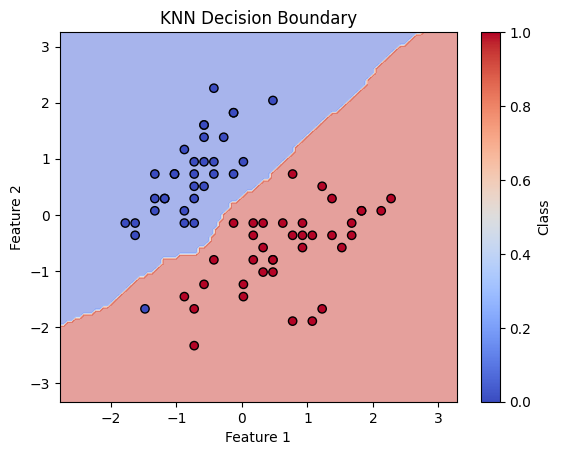

<Figure size 800x600 with 0 Axes>

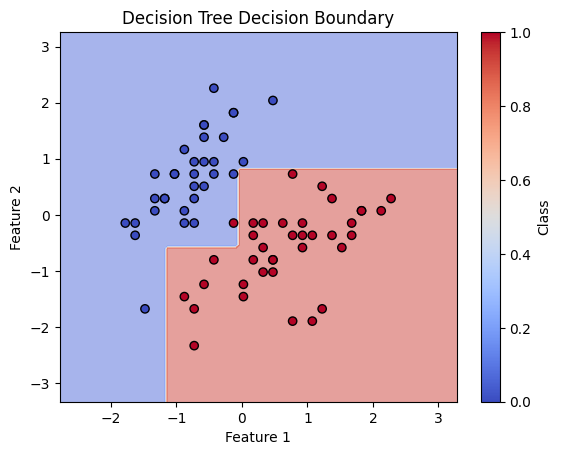

<Figure size 800x600 with 0 Axes>

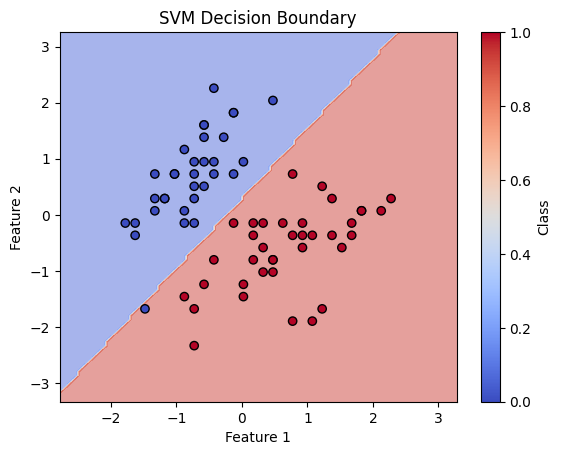

In [4]:
# Plot Decision Boundaries for Visualization-Specific Models
for name, model in models_visualization.items():
    plot_decision_boundary(model, X_train_2d, y_train, f"{name} Decision Boundary")

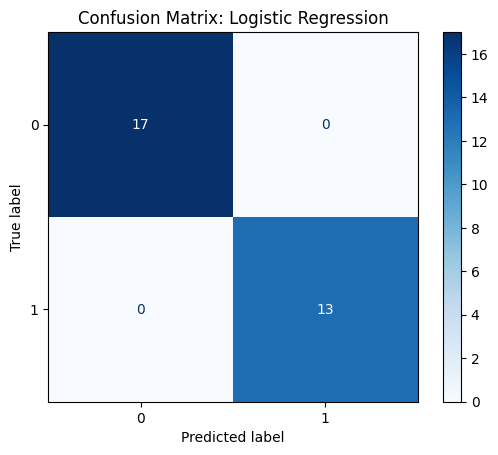

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



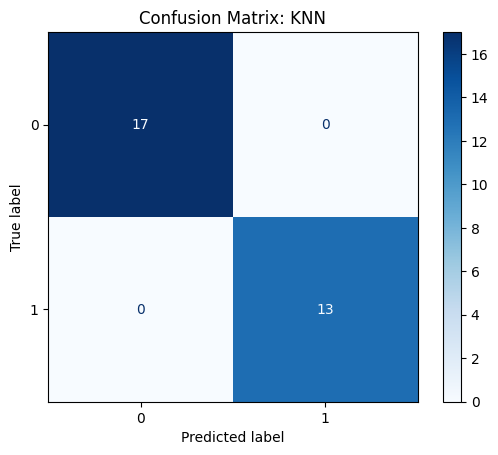

Classification Report for KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



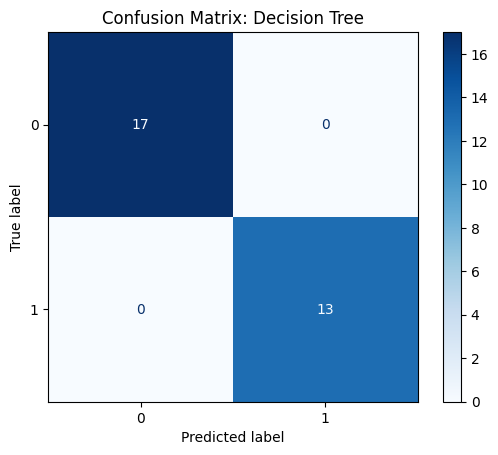

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



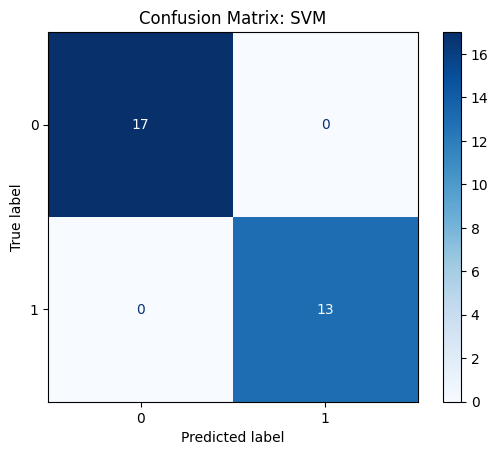

Classification Report for SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
# Confusion Matrices and Classification Reports for Original Models (on 4 features)
for name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

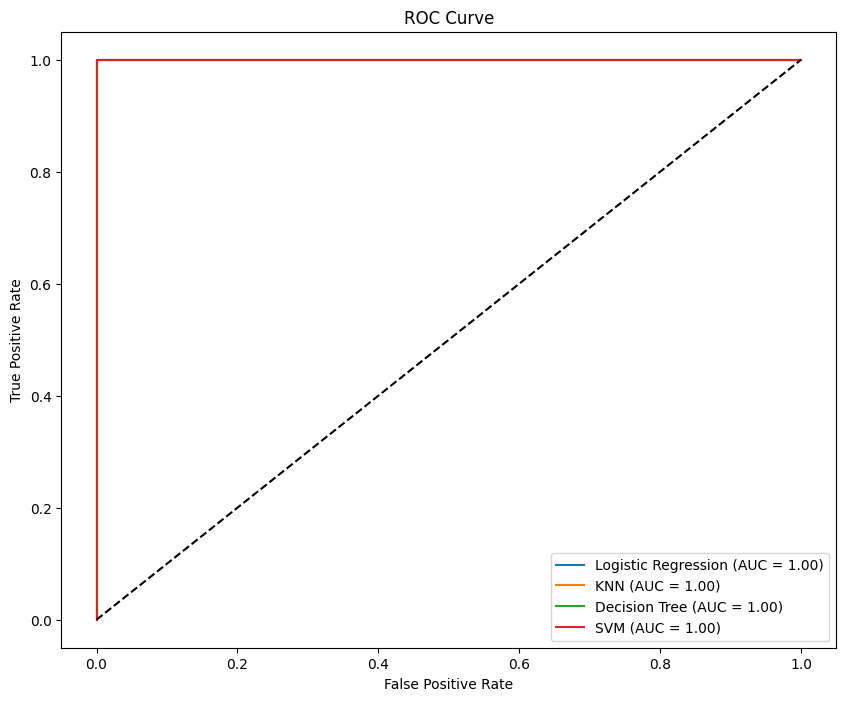

In [6]:
# ROC Curve for Original Models (on 4 features)
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

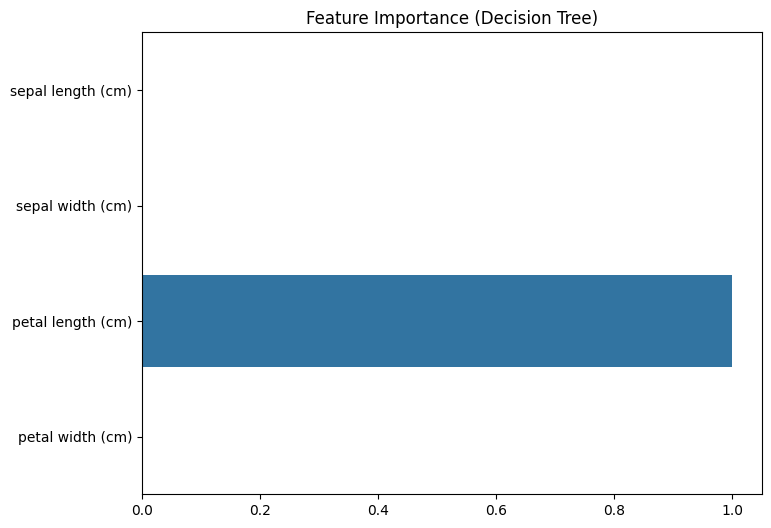

In [7]:
# Feature Importance for Decision Tree (on 4 features)
importance = dt.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=data.feature_names[:4])  # All four features
plt.title("Feature Importance (Decision Tree)")
plt.show()

In [8]:
pip install plotly


In [9]:
import plotly.graph_objects as go
import numpy as np

def plotly_decision_boundary(model, X, y, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a scatter plot for the decision boundary
    fig = go.Figure()

    # Add the decision boundary
    fig.add_trace(go.Contour(
        z=Z,
        x=np.arange(x_min, x_max, 0.01),
        y=np.arange(y_min, y_max, 0.01),
        colorscale='Blues',
        showscale=False,
        opacity=0.5,
        contours=dict(showlines=False)
    ))

    # Add training points
    fig.add_trace(go.Scatter(
        x=X[:, 0],
        y=X[:, 1],
        mode='markers',
        marker=dict(color=y, colorscale='Viridis', line_width=1),
        name='Training Data'
    ))

    fig.update_layout(
        title=title,
        xaxis_title="Feature 1",
        yaxis_title="Feature 2",
        showlegend=False,
        template="plotly_dark"
    )

    fig.show()

for name, model in models_visualization.items():
    plotly_decision_boundary(model, X_train_2d, y_train, f"{name} Decision Boundary")


In [10]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

def plotly_confusion_matrix(model, X, y, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    labels = ["Class 0", "Class 1"]

    fig = ff.create_annotated_heatmap(
        z=cm,
        x=labels,
        y=labels,
        colorscale="Viridis",
        showscale=True,
        annotation_text=cm,
    )

    fig.update_layout(
        title=title,
        xaxis_title="Predicted",
        yaxis_title="Actual",
        template="plotly_dark"
    )

    fig.show()


for name, model in models.items():
    plotly_confusion_matrix(model, X_test, y_test, f"{name} Confusion Matrix")


In [11]:
def plotly_roc_curve(models, X, y):
    fig = go.Figure()

    for name, model in models.items():
        y_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_proba)
        roc_auc = auc(fpr, tpr)

        fig.add_trace(go.Scatter(
            x=fpr, y=tpr,
            mode='lines',
            name=f"{name} (AUC = {roc_auc:.2f})"
        ))

    fig.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1],
        mode='lines',
        line=dict(dash='dash'),
        name='Random Guess'
    ))

    fig.update_layout(
        title="Interactive ROC Curve",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        template="plotly_dark"
    )

    fig.show()

# Example: Interactive ROC Curve
plotly_roc_curve(models, X_test, y_test)


In [16]:
def plotly_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    fig = go.Figure()

    # Create a horizontal bar chart with a colorscale
    fig.add_trace(go.Bar(
        x=importance,
        y=feature_names,
        orientation='h',
        marker=dict(
            colorscale='Viridis',  # Apply colorscale
            color=importance,      # Use feature importance values for color intensity
        ),
    ))

    fig.update_layout(
        title=title,
        xaxis_title="Importance",
        yaxis_title="Features",
        template="plotly_dark"
    )
    fig.show()


plotly_feature_importance(dt, data.feature_names[:4], "Feature Importance (Decision Tree)")



# Streamlit WebApp

Run this snippet locally (uncommented)

In [ ]:
# import streamlit as st
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# from sklearn.metrics import roc_curve, auc
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
#
# # Load and preprocess dataset
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target
#
# # Binary classification (classes 0 and 1)
# X = df.drop(columns=['target'])[df['target'] != 2]
# y = df['target'][df['target'] != 2]
#
# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
#
# # Initialize models
# logistic = LogisticRegression(random_state=42)
# knn = KNeighborsClassifier(n_neighbors=5)
# dt = DecisionTreeClassifier(random_state=42, max_depth=3)
# svm = SVC(probability=True, kernel='linear', random_state=42)
#
# models = {
#     "Logistic Regression": logistic,
#     "KNN": knn,
#     "Decision Tree": dt,
#     "SVM": svm
# }
#
# # Train models
# for model in models.values():
#     model.fit(X_train, y_train)
#
# # Streamlit App
# st.title("Interactive Machine Learning Model Visualization")
#
# # Model Selection
# model_name = st.selectbox("Choose a model to visualize:", list(models.keys()))
# model = models[model_name]
#
# # Feature Importance (Decision Tree)
# if model_name == "Decision Tree":
#     st.header(f"{model_name} Feature Importance")
#     importance = model.feature_importances_
#     fig = go.Figure(go.Bar(
#         x=importance,
#         y=data.feature_names,
#         orientation='h',
#         marker=dict(color=importance, colorscale='Viridis')
#     ))
#     fig.update_layout(title="Feature Importance", template="plotly_dark")
#     st.plotly_chart(fig)
#
# # Logistic Regression Coefficients
# if model_name == "Logistic Regression":
#     st.header(f"{model_name} Coefficients")
#     coefficients = model.coef_[0]
#     fig = go.Figure(go.Bar(
#         x=coefficients,
#         y=data.feature_names,
#         orientation='h',
#         marker=dict(color=coefficients, colorscale='Cividis')
#     ))
#     fig.update_layout(title="Logistic Regression Coefficients", template="plotly_dark")
#     st.plotly_chart(fig)
#
# # ROC Curve
# st.header("ROC Curve")
# fig = go.Figure()
# for name, m in models.items():
#     y_proba = m.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_proba)
#     roc_auc = auc(fpr, tpr)
#     fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f"{name} (AUC={roc_auc:.2f})"))
# fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name="Random Guess"))
# fig.update_layout(title="ROC Curve", xaxis_title="False Positive Rate", yaxis_title="True Positive Rate", template="plotly_dark")
# st.plotly_chart(fig)
#
# # Confusion Matrix
# st.header(f"{model_name} Confusion Matrix")
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, model.predict(X_test))
# fig = ff.create_annotated_heatmap(
#     z=cm,
#     x=["Class 0", "Class 1"],
#     y=["Class 0", "Class 1"],
#     colorscale="Blues",
#     showscale=True,
#     annotation_text=cm
# )
# fig.update_layout(title="Confusion Matrix", template="plotly_dark")
# st.plotly_chart(fig)
